## Homework 1
### Data Engineering 300
### Aden Benson


In [2]:
# Import data and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Add low_memory=False, as some columns have multiple datatypes and I was getting a warning
data=pd.read_csv('T_F41SCHEDULE_B43.csv', low_memory=False)

In [3]:
# First, check how many rows we have left if we were to delete all rows with missing data at the start.
removed_data=data.dropna(subset=['CARRIER','CARRIER_NAME','MANUFACTURE_YEAR','NUMBER_OF_SEATS','CAPACITY_IN_POUNDS','AIRLINE_ID',
                                 'MANUFACTURER','MODEL','AIRCRAFT_STATUS','OPERATING_STATUS'])

print('Rows left after removing missing values with no cleaning:', removed_data.shape[0])

Rows left after removing missing values with no cleaning: 132037


## Task 1

In [5]:
# In this task, we analyze Carrier, Carrier_name, Manufacture_year, number_of_seats, capacity_in_pounds, and airline_id
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132313 entries, 0 to 132312
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 132313 non-null  int64  
 1   CARRIER              132264 non-null  object 
 2   CARRIER_NAME         132208 non-null  object 
 3   MANUFACTURE_YEAR     132310 non-null  float64
 4   UNIQUE_CARRIER_NAME  132208 non-null  object 
 5   SERIAL_NUMBER        132313 non-null  object 
 6   TAIL_NUMBER          132313 non-null  object 
 7   AIRCRAFT_STATUS      132313 non-null  object 
 8   OPERATING_STATUS     132313 non-null  object 
 9   NUMBER_OF_SEATS      132306 non-null  float64
 10  MANUFACTURER         132313 non-null  object 
 11  AIRCRAFT_TYPE        102380 non-null  object 
 12  MODEL                132302 non-null  object 
 13  CAPACITY_IN_POUNDS   132212 non-null  float64
 14  ACQUISITION_DATE     131346 non-null  object 
 15  AIRLINE_ID       

#### Handle Carrier

In [7]:
# Investigate carrier
data['CARRIER'].unique()

array(['16', '3Z', '5X', '5Y', '8C', '9E', '9S', 'AA', 'ABX', 'AJQ',
       'AMQ', 'AQ', 'AS', 'AX', 'B6', 'CO', 'CS', 'CTQ', 'DL', 'E0', 'ER',
       'EV', 'F2', 'F9', 'FL', 'FX', 'G4', 'G7', 'GFQ', 'GG', 'HA', 'HP',
       'JW', 'KAQ', 'KLQ', 'L2', 'M6', 'MG', 'MQ', 'MRQ', 'NC', 'NK',
       'NW', 'OH', 'OO', 'OW', 'PCQ', 'PFQ', 'PO', 'PRQ', 'PT', 'QX',
       'RD', 'SI', 'SLQ', 'SY', 'TZ', 'U5', 'U7', 'UA', 'US', 'WI', 'WN',
       'WO', 'X9', 'XE', 'XJ', 'XP', 'YV', 'YX', 'ZQ', 'ZW', 'CP', 'E9',
       'EZ', 'FE', 'L4', nan, 'RW', 'S5', 'SX', 'VX', 'WE', '9L', 'FCQ',
       'GL', '0JQ', '0WQ', '16 ', '3Z ', '5X ', '5Y ', '8C ', '9E ',
       '9L ', '9S ', 'AA ', 'AQ ', 'AS ', 'B6 ', 'CO ', 'CP ', 'CS ',
       'DL ', 'ER ', 'EV ', 'EZ ', 'F9 ', 'FL ', 'FX ', 'G4 ', 'G7 ',
       'GL ', 'HA ', 'JW ', 'L2 ', 'L3 ', 'M6 ', 'MQ ', 'NA ', 'NC ',
       'NK ', 'NW ', 'OH ', 'OO ', 'OW ', 'PM ', 'PO ', 'PT ', 'QX ',
       'RD ', 'S5 ', 'SI ', 'SY ', 'U5 ', 'U7 ', 'UA ', 'US ', 'VX ',
   

In [8]:
data[pd.isna(data['CARRIER'])]['CARRIER_NAME'].unique()

array(['North American Airlines'], dtype=object)

Based on the code above, the missing values are NaN values. Each carrier_name value in these rows is North American Airlines, which means that NaN is actually supposed to stand for North American Airlines. However, python interprets this as a missing value. We can change all values in this column to strings to fix this issue.

In [10]:
data['CARRIER']=data['CARRIER'].astype(str)
data['UNIQUE_CARRIER']=data['UNIQUE_CARRIER'].astype(str)

#### Handle Carrier_name

In [12]:
data[pd.isna(data['CARRIER_NAME'])]['CARRIER'].value_counts()


CARRIER
OH    97
L4     8
Name: count, dtype: int64

We see that the only rows with missing values have Carrier column values as OH or L4.

In [14]:
# First, examine columns with L4 carrier.
data[data['CARRIER']=='L4']

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
11465,2007,L4,NaN,2007.0,NaN,4165,N501LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,7/19/2007 12:00:00 AM,NaN,nan
11466,2007,L4,NaN,2007.0,NaN,4168,N502LX,O,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,8/28/2007 12:00:00 AM,NaN,nan
11467,2007,L4,NaN,2007.0,NaN,4170,N503LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,10/12/2007 12:00:00 AM,NaN,nan
11468,2007,L4,NaN,2007.0,NaN,4172,N504LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,10/19/2007 12:00:00 AM,NaN,nan
11469,2007,L4,NaN,2007.0,NaN,4174,N505LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,10/25/2007 12:00:00 AM,NaN,nan
11470,2007,L4,NaN,2007.0,NaN,4176,N506LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,10/31/2007 12:00:00 AM,NaN,nan
11471,2007,L4,NaN,2007.0,NaN,4181,N507LX,O,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,12/31/2007 12:00:00 AM,NaN,nan
11472,2007,L4,NaN,2007.0,NaN,4182,N508LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,12/31/2007 12:00:00 AM,NaN,nan
18739,2008,L4,Lynx Aviation d/b/a Frontier Airlines,2007.0,Lynx Aviation d/b/a Frontier Airlines,4165,N501LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,7/19/2007 12:00:00 AM,21217.0,L3
18740,2008,L4,Lynx Aviation d/b/a Frontier Airlines,2007.0,Lynx Aviation d/b/a Frontier Airlines,4168,N502LX,O,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,8/28/2007 12:00:00 AM,21217.0,L3


All L4 carriers are either Lynx Aviation or NaN. We also see that many of the other columns are similar despite the missing values, such as similar structured tail numbers and the same manufacture year. Based on this, I will assume that all Carrier_name and Unique_carrer_name values should be Lynx Aviation.

In [16]:
# We see that all L4 Carriers has Carrier_name as Lynx Aviation. Set these missing values
for i in range(data.shape[0]):
    if data.iloc[i]['CARRIER']=='L4' and pd.isna(data.iloc[i]['CARRIER_NAME']):
        data.loc[i, 'CARRIER_NAME']='Lynx Aviation d/b/a Frontier Airlines'
        data.loc[i, 'UNIQUE_CARRIER_NAME']='Lynx Aviation d/b/a Frontier Airlines'

In [17]:
# Next, examine columns with OH Carrier
data[data['CARRIER']=='OH']['CARRIER_NAME'].unique()

array(['Comair Inc.', nan, 'PSA Airlines Inc.'], dtype=object)

All OH Carriers are either Comair Inc or PSA Airlines Inc. Upon further inspection of the dataframe data[data['CARRIER']=='OH'] (too large to be printed), I found that all missing carrier_name values should be Comair Inc. We see this because the rows with missing carrier names have similar serial number and tail number structures as Comair Imc, where the PSA Airlines rows are structured differently than the missing rows. 

In [19]:
# Above, we inferred that missing Carrier_name values for OH carriers should be Comair Inc. Set these values.
for i in range(data.shape[0]):
    if data.iloc[i]['CARRIER']=='OH' and pd.isna(data.iloc[i]['CARRIER_NAME']):
        data.loc[i, 'CARRIER_NAME']='Comair Inc.'
        data.loc[i, 'UNIQUE_CARRIER_NAME']='Comair Inc.'

#### Handle Manufacture_year

In [21]:
# First, check how missing information is shown. 
data['MANUFACTURE_YEAR'].unique()

array([2003., 2004., 2005., 1944., 1945., 1954., 1955., 1956., 1957.,
       1958., 1976., 1977., 1978., 1988., 1992., 1997., 1966., 1967.,
       1968., 1969., 1970., 1971., 1980., 1982., 1987., 1990., 1991.,
       1993., 1994., 1995., 1996., 1998., 1999., 2000., 2001., 2002.,
       2006., 1979., 1981., 1985., 1975., 1984., 1983., 1986., 1989.,
       1972., 1973., 1974., 1965., 1953., 1952., 1959., 2007., 2008.,
       2009., 1961., 2010.,    0., 2011., 2012., 1964., 2013., 2014.,
       2015., 1900., 2016., 1942., 2017., 2018., 2019., 2020., 2021.,
       1197., 2022.,   nan, 2756., 2023.])

Based on all manufacture_year values, the instances we must look at are NaN, 0, 1197, 2756, and 1900. 1900 is a missing value since the Wright brothers first manufactured the plane in 1903.

In [23]:
# Check 2756
data[data['MANUFACTURE_YEAR']==2756]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
118038,2022,ABX,ABX Air Inc,2756.0,ABX Air Inc,24531,N364CM,b,Y,0.0,Boeing,6262,B-767-300,121811.0,8/16/2016 12:00:00 AM,20453.0,ABX


The other rows I found that have serial number 24531 and tail number N364CM all have manufacture year as 1989, so it is clear this was just a mistake we can fix since this is the same plane that was owned by ABX over multple years.

In [25]:
# Fix this mistake
data.loc[118038, 'MANUFACTURE_YEAR']=1989.0

In [26]:
# Check 1197
data[data['MANUFACTURE_YEAR']==1197]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
112709,2021,KD,Western Global,1197.0,Western Global,48775,N775BC,O,y,0.0,McDonnelDouglas,7402,MD11-F,200970.0,5/15/2020 12:00:00 AM,21629.0,KD


Similar to 2756, the plane with serial number 48775 owned by Western Global should have a manufacture year of 1997 based on the other rows with this serial number. (To check this, I used data[data['SERIAL_NUMBER']==48775]. I just didn't paste it above to save space).

In [28]:
# Fix this mistake
data.loc[112709, 'MANUFACTURE_YEAR']=1997.0

In [29]:
# Check 1900
data[data['MANUFACTURE_YEAR']==1900]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
61596,2014,OO,SkyWest Airlines Inc.,1900.0,SkyWest Airlines Inc.,10010,N223AG,b,Y,66.0,Bombardier,6311,CRJ700-2C10,75000.0,10/25/2013 12:00:00 AM,20304.0,OO
61597,2014,OO,SkyWest Airlines Inc.,1900.0,SkyWest Airlines Inc.,10024,N224AG,b,Y,66.0,Bombardier,6311,CRJ700-2C10,75000.0,11/20/2013 12:00:00 AM,20304.0,OO
61598,2014,OO,SkyWest Airlines Inc.,1900.0,SkyWest Airlines Inc.,10033,N225AG,b,Y,66.0,Bombardier,6311,CRJ700-2C10,75000.0,7/13/2013 12:00:00 AM,20304.0,OO
61599,2014,OO,SkyWest Airlines Inc.,1900.0,SkyWest Airlines Inc.,7884,N8884E,b,Y,50.0,Bombardier,6291,CRJ200-2B19,53000.0,12/17/2003 12:00:00 AM,20304.0,OO
61600,2014,OO,SkyWest Airlines Inc.,1900.0,SkyWest Airlines Inc.,7903,N8903A,b,Y,50.0,Bombardier,6291,CRJ200-2B19,53000.0,2/2/2004 12:00:00 AM,20304.0,OO
61601,2014,OO,SkyWest Airlines Inc.,1900.0,SkyWest Airlines Inc.,7923,N8923A,b,Y,50.0,Bombardier,6291,CRJ200-2B19,53000.0,6/29/2004 12:00:00 AM,20304.0,OO
61602,2014,OO,SkyWest Airlines Inc.,1900.0,SkyWest Airlines Inc.,7933,N8933B,b,Y,50.0,Bombardier,6291,CRJ200-2B19,53000.0,7/13/2004 12:00:00 AM,20304.0,OO
61603,2014,OO,SkyWest Airlines Inc.,1900.0,SkyWest Airlines Inc.,7965,N8965E,b,Y,50.0,Bombardier,6291,CRJ200-2B19,53000.0,8/27/2004 12:00:00 AM,20304.0,OO
61604,2014,OO,SkyWest Airlines Inc.,1900.0,SkyWest Airlines Inc.,7968,N8968E,b,Y,50.0,Bombardier,6291,CRJ200-2B19,53000.0,9/30/2004 12:00:00 AM,20304.0,OO
61605,2014,OO,SkyWest Airlines Inc.,1900.0,SkyWest Airlines Inc.,7982,N8982A,b,Y,50.0,Bombardier,6291,CRJ200-2B19,53000.0,10/29/2004 12:00:00 AM,20304.0,OO


For some reason in 2014, there was some manufacture_year values that were set as 1900. Similar to above, we can use the serial numbers from the rest of the SkyWest Airlines Inc. data and find the actual manufacturing years for these airplanes.

In [31]:
# Iterate through the indeces above of all values where manufacture_year=1900
for i in range(61596, 61606):
    
    # For this row's serial number, find all other rows for that serial number 
    # in the dataset under SkyWest Airlines.
    serial_num=data.loc[i]['SERIAL_NUMBER']
    
    # Find each unique manufacturing year for that serial number
    man_year=sorted(data[(data['SERIAL_NUMBER']==serial_num) & (data['CARRIER_NAME']=='SkyWest Airlines Inc.')]['MANUFACTURE_YEAR'].unique())
    
    # Use the second lowest manufacturing year listed underneath that serial number, since 1900 is obviously too early. Fix this missing value
    data.loc[i, "MANUFACTURE_YEAR"]=man_year[1]

In [32]:
# Check nan
data[pd.isna(data['MANUFACTURE_YEAR'])]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
116651,2022,5Y,Atlas Air Inc.,NaN,Atlas Air Inc.,26259,N664GT,B,Y,0.0,BOEING,8192,B747-400,0.0,1/25/2022 12:00:00 AM,20007.0,5Y
124680,2023,9E,Endeavor Air Inc.,NaN,Endeavor Air Inc.,10134,N655CA,O,Y,69.0,BOMBARDIER,6311,CL-600-2C10,18055.0,NaN,20363.0,9E
124681,2023,9E,Endeavor Air Inc.,NaN,Endeavor Air Inc.,10182,N690CA,O,N,69.0,BOMBARDIER,6311,CL-600-2C10,18055.0,NaN,20363.0,9E


Out of the three values with NaN manufacturing years, I was able to find the correct value for 2 of them. For the Atlas Air entry, this is the only row with this serial number or tail number. Below, I will use median imputation on the B747-400 models to fix the missing value. For the two Endeavor Air entries, the correct manufacturing year is 2004. 

In [34]:
# Fix endeavor columns
data.loc[124680, 'MANUFACTURE_YEAR']=2004.0
data.loc[124681, 'MANUFACTURE_YEAR']=2004.0

In [35]:
# Use simple median imputation to fill in Atlas Air row
from sklearn.impute import SimpleImputer

# Create dataframe of rows where the model is B747-400
nan_impute_df=data[data['MODEL']=='B747-400']

# Create imputer using sklearn
median_imputer = SimpleImputer(strategy='median')
nan_impute_df.loc[:,'MANUFACTURE_YEAR'] = median_imputer.fit_transform(nan_impute_df[['MANUFACTURE_YEAR']])

# Below, we see that the imputed manufacture year is 2000
print(nan_impute_df.loc[116651]['MANUFACTURE_YEAR'])

# Update this value in our actual dataset
data.loc[116651, 'MANUFACTURE_YEAR']=2000.0

2000.0


In [36]:
# Check when manufacture_year=0
# data[data['MANUFACTURE_YEAR']==0] Commented to save space

This is a longer list, so we can try to do the same thing as we did with 1900 and match the serial numbers to other entries.

In [38]:
index_list=data[data['MANUFACTURE_YEAR']==0].index.to_list()
for i in index_list:
    # Find serial number and carrier name for each 0 value.
    serial_num=data.loc[i]['SERIAL_NUMBER']
    carrier_name=data.loc[i]['CARRIER_NAME']
    
    # Find list of unique manufacturing years for that serial number/carrier combination
    man_year=sorted(data[(data['SERIAL_NUMBER']==serial_num) & (data['CARRIER_NAME']==carrier_name)]['MANUFACTURE_YEAR'].unique())
    
    # If there is another manufacturing year listed other than 0 for that serial number, fix that value
    if len(man_year)>1:
        data.loc[i, "MANUFACTURE_YEAR"]=man_year[1]

Since there are still 0 plenty of values left, we can use a different method of imputation. Similar to above, I am going to use the median. However, this time I am going to find the median for each carrier_name, as the models are very specific in this instance.

In [40]:
# Set 0 values to NaN so we can use fit_transform
for i in range(data.shape[0]):
    if data.loc[i,"MANUFACTURE_YEAR"]==0:
        data.loc[i, "MANUFACTURE_YEAR"]=np.nan
        
# List of carriers in our dataframe that still have NaN as the manufacture year
carriers=data[pd.isna(data['MANUFACTURE_YEAR'])]['CARRIER_NAME'].unique()

# Iterate through all carriers with missing values in manufacture_year col
for carrier in carriers:
    
    # Find indeces of rows with 0 as the manufacture year and the current carrier
    indeces=data[(pd.isna(data['MANUFACTURE_YEAR'])) & (data['CARRIER_NAME']==carrier)].index
    
    # Use simple median imputation for this carrier
    df_carrier=data[data['CARRIER_NAME']==carrier]
    median_imputer = SimpleImputer(strategy='median')
    df_carrier.loc[:,'MANUFACTURE_YEAR'] = median_imputer.fit_transform(df_carrier[['MANUFACTURE_YEAR']])
    
    # For each index previously nan, fill that with the imputed value in our actual dataset.
    for i in indeces:
        data.loc[i, "MANUFACTURE_YEAR"]=df_carrier.loc[i, "MANUFACTURE_YEAR"]
    

#### Handle Number_Of_Seats

In [42]:
# Don't treat 0 as a missing value, as cargo planes could be missing 0 seats. Only handle nan.
data['NUMBER_OF_SEATS'].unique()

array([ 50.,  70.,   0.,   2.,   6.,  32., 131., 140., 136., 158., 165.,
       167., 225., 267., 188.,  87., 180., 148., 247.,  72.,  56., 127.,
       112., 124., 111., 144., 120., 172., 160., 150., 100., 175., 104.,
       283., 157., 155.,  37., 235., 174., 216., 210., 204., 183., 119.,
       252.,  30., 142., 195., 190.,  66., 178., 186., 277., 268., 287.,
       154., 265.,  48.,  40.,   8.,   9., 132., 114., 117., 118., 137.,
       149., 130., 162., 262., 123., 264., 189., 134., 126., 128., 173.,
        59.,  34.,  44.,   7.,  33.,  21., 198.,  78., 110., 273., 125.,
       353., 430., 182., 403., 184., 224., 298., 243., 246.,  90., 122.,
        64.,  63., 108., 215., 170., 318., 138., 200., 185., 232., 168.,
        75., 363., 244., 347., 219., 109., 288., 276., 193., 203., 293.,
        99., 284., 356., 365., 258., 355., 357., 113., 360., 362., 325.,
       220., 194., 223., 164.,  86., 116.,  88.,   5.,  76.,  47., 141.,
        19.,  74., 199., 206., 102., 156., 286., 25

In [43]:
data[pd.isna(data['NUMBER_OF_SEATS'])]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
97550,2019,M6,Amerijet International,1982.0,Amerijet International,22218,N743AX,b,Y,NaN,BOEING,6252,767-232SFCARGO,96000.0,7/1/2010 12:00:00 AM,20151.0,M6
97551,2019,M6,Amerijet International,1988.0,Amerijet International,24146,N316CM,b,Y,NaN,BOEING,6262,767-338ERCARGO,118000.0,8/19/2014 12:00:00 AM,20151.0,M6
97552,2019,M6,Amerijet International,1988.0,Amerijet International,24407,N319CM,b,Y,NaN,BOEING,6262,767-338ERCARGO,118000.0,9/29/2014 12:00:00 AM,20151.0,M6
97553,2019,M6,Amerijet International,1990.0,Amerijet International,24929,N373CM,b,Y,NaN,BOEING,6262,767-338ERCARGO,118000.0,7/15/2016 12:00:00 AM,20151.0,M6
97554,2019,M6,Amerijet International,1991.0,Amerijet International,25195,N396CM,b,Y,NaN,BOEING,6262,767-323ERCARGO,118000.0,11/29/2017 12:00:00 AM,20151.0,M6
97555,2019,M6,Amerijet International,1993.0,Amerijet International,26995,N347CM,b,Y,NaN,BOEING,6262,767-323ERCARGO,118000.0,10/12/2018 12:00:00 AM,20151.0,M6
97556,2019,M6,Amerijet International,1994.0,Amerijet International,27184,N378CX,b,Y,NaN,BOEING,6262,767-323ERCARGO,118000.0,6/8/2018 12:00:00 AM,20151.0,M6


Because all of these planes are cargo planes, we can assume that there are 0 seats on the plane. When investigating these serial numbers, we see that other years for that same plane are also listed at 0 seats. Thus, for imputation we can simply set each number_of_seats in this dataframe as 0.

In [45]:
index_list=data[pd.isna(data['NUMBER_OF_SEATS'])].index.to_list()
for i in index_list:
    data.loc[i, 'NUMBER_OF_SEATS']=0.0

#### Handle Capacity_in_pounds

In [47]:
# First investigate missing rows
data[pd.isna(data['CAPACITY_IN_POUNDS'])]['CARRIER_NAME'].value_counts()

CARRIER_NAME
Federal Express Corporation    96
Atlas Air Inc.                  3
Spirit Air Lines                2
Name: count, dtype: int64

We see that the majority of missing rows comes from the same carriers. Investigate the models.

In [49]:
print(data[(pd.isna(data['CAPACITY_IN_POUNDS']))]['MODEL'].value_counts())

MODEL
MD-11            57
DC-10-10         26
DC-10-30         13
B767-300          2
A-320-PSGRneo     2
B767-200          1
Name: count, dtype: int64


All missing values only come from six different models. To fix this, find the average capacity from filled in values for each column, and then impute based on the mean.

In [51]:
# Find average capacities for our missing values.
av_md_11_cap=data[(data['MODEL']=='MD-11') & (data['CAPACITY_IN_POUNDS'].notnull())]['CAPACITY_IN_POUNDS'].mean()
av_dc_1010_cap=data[(data['MODEL']=='DC-10-10') & (data['CAPACITY_IN_POUNDS'].notnull())]['CAPACITY_IN_POUNDS'].mean()
av_dc_1030_cap=data[(data['MODEL']=='DC-10-30') & (data['CAPACITY_IN_POUNDS'].notnull())]['CAPACITY_IN_POUNDS'].mean()
av_b767_300_cap=data[(data['MODEL']=='B767-300') & (data['CAPACITY_IN_POUNDS'].notnull())]['CAPACITY_IN_POUNDS'].mean()
av_a_320_cap=data[(data['MODEL']=='A-320-PSGRneo') & (data['CAPACITY_IN_POUNDS'].notnull())]['CAPACITY_IN_POUNDS'].mean()
av_b767_200_cap=data[(data['MODEL']=='B767-200') & (data['CAPACITY_IN_POUNDS'].notnull())]['CAPACITY_IN_POUNDS'].mean()

# Impute these into our df
def impute_capacity(row):
    if pd.isnull(row['CAPACITY_IN_POUNDS']):
        model = row['MODEL']
        if model == 'MD-11':
            return av_md_11_cap
        elif model == 'DC-10-10':
            return av_dc_1010_cap
        elif model == 'DC-10-30':
            return av_dc_1030_cap
        elif model == 'B767-300':
            return av_b767_300_cap
        elif model == 'A-320-PSGRneo':
            return av_a_320_cap
        elif model == 'B767-200':
            return av_b767_200_cap
    return row['CAPACITY_IN_POUNDS']

# Use the function above to impute into our dataframe
data["CAPACITY_IN_POUNDS"] = data.apply(impute_capacity, axis=1)

#### Handle Airline_id

In [53]:
# All missing values in our airline_id column are Lynx Aviation or Comair, likely connected to the missing values we fixed in the CARRIER section.
data[pd.isna(data['AIRLINE_ID'])]['CARRIER_NAME'].unique()

array(['Lynx Aviation d/b/a Frontier Airlines', 'Comair Inc.'],
      dtype=object)

In [54]:
# Below, we see all Lynx Aviation planes have an airline id of 21217. Update these when the value is missing
data[data['CARRIER_NAME']=='Lynx Aviation d/b/a Frontier Airlines']

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
11465,2007,L4,Lynx Aviation d/b/a Frontier Airlines,2007.0,Lynx Aviation d/b/a Frontier Airlines,4165,N501LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,7/19/2007 12:00:00 AM,NaN,nan
11466,2007,L4,Lynx Aviation d/b/a Frontier Airlines,2007.0,Lynx Aviation d/b/a Frontier Airlines,4168,N502LX,O,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,8/28/2007 12:00:00 AM,NaN,nan
11467,2007,L4,Lynx Aviation d/b/a Frontier Airlines,2007.0,Lynx Aviation d/b/a Frontier Airlines,4170,N503LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,10/12/2007 12:00:00 AM,NaN,nan
11468,2007,L4,Lynx Aviation d/b/a Frontier Airlines,2007.0,Lynx Aviation d/b/a Frontier Airlines,4172,N504LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,10/19/2007 12:00:00 AM,NaN,nan
11469,2007,L4,Lynx Aviation d/b/a Frontier Airlines,2007.0,Lynx Aviation d/b/a Frontier Airlines,4174,N505LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,10/25/2007 12:00:00 AM,NaN,nan
11470,2007,L4,Lynx Aviation d/b/a Frontier Airlines,2007.0,Lynx Aviation d/b/a Frontier Airlines,4176,N506LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,10/31/2007 12:00:00 AM,NaN,nan
11471,2007,L4,Lynx Aviation d/b/a Frontier Airlines,2007.0,Lynx Aviation d/b/a Frontier Airlines,4181,N507LX,O,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,12/31/2007 12:00:00 AM,NaN,nan
11472,2007,L4,Lynx Aviation d/b/a Frontier Airlines,2007.0,Lynx Aviation d/b/a Frontier Airlines,4182,N508LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,12/31/2007 12:00:00 AM,NaN,nan
18739,2008,L4,Lynx Aviation d/b/a Frontier Airlines,2007.0,Lynx Aviation d/b/a Frontier Airlines,4165,N501LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,7/19/2007 12:00:00 AM,21217.0,L3
18740,2008,L4,Lynx Aviation d/b/a Frontier Airlines,2007.0,Lynx Aviation d/b/a Frontier Airlines,4168,N502LX,O,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,8/28/2007 12:00:00 AM,21217.0,L3


In [55]:
for i in range(11465, 11473):
    data.loc[i, 'AIRLINE_ID']=21217.0

In [56]:
## Investation of the df below tells us that Comair changed their airline id in 2013
data[data['CARRIER_NAME']=='Comair Inc.']
# Anything before 2013 is 20417.
# 2013 is null
# Anything after 2013 is 20397.


,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
4896,2006,OH,Comair Inc.,1993.0,Comair Inc.,7011,N912CA,B,Y,50.0,CANADAIR,NaN,RJ100/ER,47000.0,4/29/1993 12:00:00 AM,20417.0,OH
4897,2006,OH,Comair Inc.,1993.0,Comair Inc.,7012,N914CA,B,Y,50.0,CANADAIR,NaN,RJ100/ER,47000.0,4/29/1993 12:00:00 AM,20417.0,OH
4898,2006,OH,Comair Inc.,1993.0,Comair Inc.,7013,N915CA,B,Y,50.0,CANADAIR,NaN,RJ100/ER,47000.0,6/25/1993 12:00:00 AM,20417.0,OH
4899,2006,OH,Comair Inc.,1993.0,Comair Inc.,7014,N916CA,B,Y,50.0,CANADAIR,NaN,RJ100/ER,47000.0,6/3/1993 12:00:00 AM,20417.0,OH
4900,2006,OH,Comair Inc.,1993.0,Comair Inc.,7017,N917CA,B,Y,50.0,CANADAIR,NaN,RJ100/ER,47000.0,7/29/1993 12:00:00 AM,20417.0,OH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54702,2013,OH,Comair Inc.,2008.0,Comair Inc.,15157,N538CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,1/11/2008 12:00:00 AM,NaN,nan
54703,2013,OH,Comair Inc.,2008.0,Comair Inc.,15159,N548CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,1/28/2008 12:00:00 AM,NaN,nan
54704,2013,OH,Comair Inc.,2008.0,Comair Inc.,15164,N549CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,2/29/2008 12:00:00 AM,NaN,nan
54705,2013,OH,Comair Inc.,2008.0,Comair Inc.,15168,N554CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,3/20/2008 12:00:00 AM,NaN,nan


In [57]:
# To fix this, we can choose one of these ids and set 2013 to this value. I am choosing to set 2013 to airline_id 20417.
for i in range(54610, 54707):
    data.loc[i, "AIRLINE_ID"]=20417.0

## Task 2

### First, investigate MANUFACTURER column

In [60]:
# Create a list of plane manufacturers that are common in the dataset. 
# We will search for this string in each row to hopefully standardize some values.

# Notes: Some of these aren't manufacturers, but are leasers. However, this is the best information we are given.
#        I am choosing to keep Mcdonnel Douglas and Douglas Aircrafts separate, as they were separate companies before the merger.

manufacturers=['Boeing', 'Embraer', 'Bombardier', 'Airbus', 'McD', 
               'Cessna', 'Canadair', 'Douglas', 'Dehavilland','ATR',
               'Gulfstream','Saab','Convair','Lockheed','Dassault',
               'Dornier','Easyjet','Curtiss','Iberia','SMBC','GECAS',
               'Aercap','BAE','Piper','Hawker', 'Fokker','ALC','Peach','Raytheon',
               'ICBC','JPLease','Lear','IAI','Beechcraft']

# Other notes outside of this string finding technique that we can account for
# ATR=aerospatiale
# Challenger300 is bombardier
# Dassault is listed as Dassult sometimes
# IAI is spelled out
# Raytheon is misspelled


In [61]:
# First, handle the majority of standardization with a for loop that searches for each string 
for manufacturer in manufacturers:
    
    # Create a list of binary values that tells us whether a manufacturer is in a row, non-case sensitive
    manufacturer_binary_list=data['MANUFACTURER'].str.contains(manufacturer, case=False)
    
    # For each value that is true, update the manufacturer label to a standardized label
    for i in range(data.shape[0]):
        if manufacturer_binary_list[i]==True:
            data.loc[i, 'MANUFACTURER']=manufacturer

In [62]:
# Handle other standardizations in the manufacture column that aren't caught by our string matching technique
for i in range(data.shape[0]):
    # Aerospatiale=ATR
    if 'aero' in data.loc[i, 'MANUFACTURER'].lower():
        data.loc[i, 'MANUFACTURER']='ATR'
    
    # Challenger is Bombardier
    if 'chall' in data.loc[i, 'MANUFACTURER'].lower():
        data.loc[i, 'MANUFACTURER']='Bombardier'
        
    # Dassault is listed as Dassalt sometimes
    if 'dassult' in data.loc[i, 'MANUFACTURER'].lower():
        data.loc[i, 'MANUFACTURER']='Dassault'
        
    # IAI is spelled out
    if 'israel' in data.loc[i, 'MANUFACTURER'].lower():
        data.loc[i, 'MANUFACTURER']='IAI'
    
    # Raytheon is misspelled
    if 'raetheon' in data.loc[i, 'MANUFACTURER'].lower():
        data.loc[i, 'MANUFACTURER']='Raytheon'
        
    # Boeing is shortened
    if 'b757' in data.loc[i, 'MANUFACTURER'].lower():
        data.loc[i, 'MANUFACTURER']='Boeing'

### Next, handle standardization of MODEL column

NOTE: I am choosing to standardize based on the primary model of the plane. For example, Boeing's 737-74H and 737-823 are technically different models of the 737. However, in my standardization I am choosing to not go this deep, and only look at the planes primary model.

In [64]:
data['MODEL'].value_counts()

MODEL
EMB-145          2614
B-737-7H4        2470
B737-823         2370
A320-232         2333
A321-231         2259
                 ... 
B-777-212           1
B-777-2U8           1
B767-328            1
CHAL-601-3A         1
ERJ170-200STD       1
Name: count, Length: 1340, dtype: int64

In [65]:
# Many of the model names have spaces on the front/end, use underscores instead of dashes, or are uppercase. Perform a basic clean first on all model names
def basic_clean(model):
    if pd.isna(model):
        return model
    
    # Remove extra spaces on the front or back
    model=model.strip()
    
    # Make all letters lowercase
    model=model.lower()
    
    # Replace underscores with dashes
    model=model.replace('_','-')
    
    return model

data['MODEL']=data['MODEL'].apply(basic_clean)

After our basic clean, I will now perform a string matching of the 10 most common Manufacturers to standardize. To do this, I will create a dictionary of key stings and labels to output for each of the top 10 manufacturers, and then will map these labels onto all rows with the manufacturer in question and where the string appears in the MODEL column. This will greatly reduce the amount of different model names that occur over our top 10 manufacturers. If I was to really clean the entire dataset, I would do this over all manufacturers, but this would take ages. 

In [67]:
# Next, create a mapping dictionary for each of the top 10 manufacturers
boeing_mapping={
    '717': 'Boeing 717', '727': 'Boeing 727', '73': 'Boeing 737', '74': 'Boeing 747', '757': 'Boeing 757',
    '767': 'Boeing 767', '777': 'Boeing 777', '787': 'Boeing 787'
}

In [68]:
airbus_mapping={
    'a220': 'Airbus 220', 'a30': 'Airbus 300', 'a-30': 'Airbus 300', 'a310': 'Airbus 310','a-310': 'Airbus 310',
    '319-11': 'Airbus 320','a318': 'Airbus 320','a-318': 'Airbus 320', '318-11': 'Airbus 320',
    'a319': 'Airbus 320', 'a-319': 'Airbus 320', 'a32': 'Airbus 320', 'a-32': 'Airbus 320', '320': 'Airbus 320', '321': 'Airbus 320',
    'a330': 'Airbus 330',  'a350': 'Airbus 350'
}

In [69]:
bombardier_mapping={
    'bd-500': 'Bombardier 500', 
    'crj100': 'Bombardier CRJ100', 'crj-100': 'Bombardier CRJ100',
    'crj-200': 'Bombardier CRJ200','crj200': 'Bombardier CRJ200',
    'crj-400': 'Bombardier CRJ400', 'crj550': 'Bombardier CRJ550', 'crj-550': 'Bombardier CRJ550',
    'crj-70': 'Bombardier CRJ700','crj70': 'Bombardier CRJ700', 'bd-700': 'Bombardier CRJ700',
    'rj-900': 'Bombardier CRJ900','crj90': 'Bombardier CRJ900',
    'bd-100': 'Bombardier Challenger 300',
    'chal-3': 'Bombardier Challenger 300', 'chal300': 'Bombardier Challenger 300', 'challenger300': 'Bombardier Challenger 300',
    'cl-60': 'Bombardier Challenger 600',
    'cl600': 'Bombardier Challenger 600', 'chal60': 'Bombardier Challenger 600', 'chall60': 'Bombardier Challenger 600', 
    'challenger60': 'Bombardier Challenger 600', '601': 'Bombardier Challenger 600', '604': 'Bombardier Challenger 600',
    'cl65': 'Bombardier Challenger 650',
    'globalexpress': 'Bombardier Global Express','q400': 'Bombardier Q400'
}


In [70]:
embraer_mapping={
    'emb-120': 'Embraer 120', 'emb120': 'Embraer 120',
    'emb-135': 'Embraer ERJ 135', 'erj-135': 'Embraer ERJ 135', 'embraer-135': 'Embraer ERJ 135','erj135': 'Embraer ERJ 135', 'emb135': 'Embraer ERJ 135',
    'emb-140': 'Embraer ERJ 140', 'erj-140': 'Embraer ERJ 140', 'embraer-140': 'Embraer ERJ 140', 'erj140': 'Embraer ERJ 140', 'emb140': 'Embraer ERJ 140',
    'emb-145': 'Embraer ERJ 145', 'erj-145': 'Embraer ERJ 145', 'embraer-145': 'Embraer ERJ 145', 'erj145': 'Embraer ERJ 145', 'emb145': 'Embraer ERJ 145',
    'emb-170': 'Embraer ERJ 170', 'erj-170': 'Embraer ERJ 170', 'emb170': 'Embraer ERJ 170', 'erj170': 'Embraer ERJ 170',
    'emb175': 'Embraer 175', 'emb-175': 'Embraer 175', 'erj-175': 'Embraer 175', 'erj175': 'Embraer 175', 
    'emb-190': 'Embraer ERJ 190', 'erj-190': 'Embraer ERJ 190', 'emb190': 'Embraer ERJ 190', 'erj190': 'Embraer ERJ 190', 'e190': 'Embraer ERJ 190',
    'phenom': "Embraer Phenom 300", 'legacy': 'Embraer Legacy'
}


In [71]:
mcd_mapping={
    'dc-6': 'Douglas DC-6', 'dc-8': 'Douglas DC-8', 'dc-9': 'Douglas DC-9', 'dc9': 'Douglas DC-9', 'dc-10': 'Douglas DC-10', 'dc10': 'Douglas DC-10',
    'md-11': 'McDonnell Douglas MD-11', 'md-8': 'McDonnell Douglas MD-80', 'md-90': 'McDonnell Douglas MD-90', 'super80': 'McDonnell Douglas MD-80',
    'md11': 'McDonnell Douglas MD-11', 'md8': 'McDonnell Douglas MD-80'
}

In [72]:
cessna_mapping={
    'ces-180': 'Cessna 180',
    'ce-206': 'Cessna 206', 'c-206': 'Cessna 206', 'ces-206': 'Cessna 206', 'stationr': 'Cessna 206',
    'ce-208': 'Cessna 208', 'c-208': 'Cessna 208', 'ces-208': 'Cessna 208', '208b': 'Cessna 208',
    '210n': 'Cessna Centurion', 
    'ce-340': 'Cessna 340', 'c340': 'Cessna 340', 
    'citat': 'Cessna Citation', 'cessna510': 'Cessna Citation','560xl': 'Cessna Citation', '750': 'Cessna Citation',
    'ce-680': 'Cessna Citation Sovereign', 'sovereign': 'Cessna Citation Sovereign', 'cj3': 'Cessna Citation CJ3'
}

In [73]:
canadair_mapping={
    # Lots of overlap with bombardier, since they merged
    'rj100': 'Canadair RJ 100',
    'rj-2': 'Canadair RJ 200', 'rj-700': 'Canadair RJ 700'
}


In [74]:
douglas_mapping={
    # Overlaps with McDonnell Douglas, they also merged
    'c-11': 'Douglas C-118', 'c-46': 'Douglas C-46', 'dc8': 'Douglas DC-8'
}

In [75]:
atr_mapping={
    'atr-72': 'ATR 72', 'atr72': 'ATR 72',
    'atr-42': 'ATR 42', 'atr42': 'ATR 42',
    'cn235': 'ATR CASA 235'
}

In [76]:
ge_mapping={
    # GE creates engines for Bombardier, not a full plane manufacturer
    'crj900': 'Bombardier CRJ900', 'crj200': 'Bombardier CRJ200',
    'crj70': 'Bombardier CRJ700', 'cl-600': 'Bombardier Challenger 600'
}

In [77]:
# Create a dictionary that maps the manufacturer name to each of the dictionaries created above.
manufacturer_to_model_mapping={
    'Boeing': boeing_mapping,
    'Airbus': airbus_mapping,
    'Embraer': embraer_mapping,
    'Bombardier': bombardier_mapping,
    'McD': mcd_mapping,
    'Cessa': cessna_mapping,
    'Canadair': canadair_mapping,
    'Douglas': douglas_mapping,
    'ATR': atr_mapping
}

In [78]:
# Go through each model out of our top ten
for manufacturer, mapping_dict in manufacturer_to_model_mapping.items():
    
    
    # Iterate through each mapping for this specific manufacturer
    for key, label in mapping_dict.items():

        # Find when the key appears in the model string for this manufacturer
        mask = (data['MANUFACTURER'] == manufacturer) & data['MODEL'].str.contains(key, regex=False, na=False)
        
        # Update all model names that match our key
        data.loc[mask, 'MODEL']=label

In [79]:
data['MODEL'].value_counts()

MODEL
Boeing 737            29196
Airbus 320            18881
Boeing 757             9687
Boeing 767             6894
Embraer ERJ 145        6011
                      ...  
raytheonbeechcraft        1
ce-560-560xls             1
c-206pass                 1
dc-9-33cargo              1
westwind                  1
Name: count, Length: 341, dtype: int64

We began with 1340 distinct models, and ended with only 341. This means that we decreased the number of distinct labels by almost 1000.

### Next, standardize AIRCRAFT_STATUS

In [82]:
data['AIRCRAFT_STATUS'].value_counts()

AIRCRAFT_STATUS
O    79487
b    30852
B    12699
a     7804
A     1330
L      122
o       19
Name: count, dtype: int64

From the BTS data website, I found that O=Owned, A=Capital Lease, and B=Operating Lease. L is an unknown entry, so I will set all of these values to NaN since they don't mean anything to us. Since we are not imputing these columns, these rows will likely be deleted in Task 3.

In [84]:
# Standardize all lowercase values as uppercase
data['AIRCRAFT_STATUS']=data['AIRCRAFT_STATUS'].str.upper()

# Set any values of L as NaN, since this is technically missing data.
data.loc[data['AIRCRAFT_STATUS']=='L', 'AIRCRAFT_STATUS']=np.nan

### Finally, standardize OPERATING_STATUS

This one is pretty simple, we can make all lowercase y values uppercase, and then set the missing row as NaN. Again, since we aren't imputing on this step, this will likely just be a removed row.

In [87]:
data['OPERATING_STATUS'].value_counts()

OPERATING_STATUS
Y    126577
N      5664
y        71
          1
Name: count, dtype: int64

In [88]:
# Standardize lowercase values as uppercase
data['OPERATING_STATUS']=data['OPERATING_STATUS'].str.upper()

# Set the missing column to NaN
data.loc[data['OPERATING_STATUS']==' ', 'OPERATING_STATUS']=np.nan

## Task 3

Check how many rows we have left after removing missing rows from our cleaned dataframe, compared to how many rows we would have if we didn't clean.

In [91]:
# See how many rows are left if we delete missing values after cleaning
removed_data_post_cleaning=data.dropna(subset=['CARRIER','CARRIER_NAME','MANUFACTURE_YEAR','NUMBER_OF_SEATS','CAPACITY_IN_POUNDS','AIRLINE_ID',
                                 'MANUFACTURER','MODEL','AIRCRAFT_STATUS','OPERATING_STATUS'])

print('Rows left after removing missing values after cleaning:', removed_data_post_cleaning.shape[0])

Rows left after removing missing values after cleaning: 132179


I only chose to remove missing values from the columns we examined, as there were some columns with many missing values that we were not told to impute or transform.

In [93]:
# See how many rows we saved
print('Number of rows saved after imputation and transformation:', removed_data_post_cleaning.shape[0]-removed_data.shape[0])

Number of rows saved after imputation and transformation: 142


In [94]:
# Set actual df as the df with removed rows
data=removed_data_post_cleaning

## Task 4

In [96]:
# Check skewness for number of seats and capacity in pounds
print('Skewness in number of seats:',data['NUMBER_OF_SEATS'].skew())
print('Skewness in capacity in pounds:',data['CAPACITY_IN_POUNDS'].skew())

Skewness in number of seats: 0.4316454677404661
Skewness in capacity in pounds: 4.067256628764957


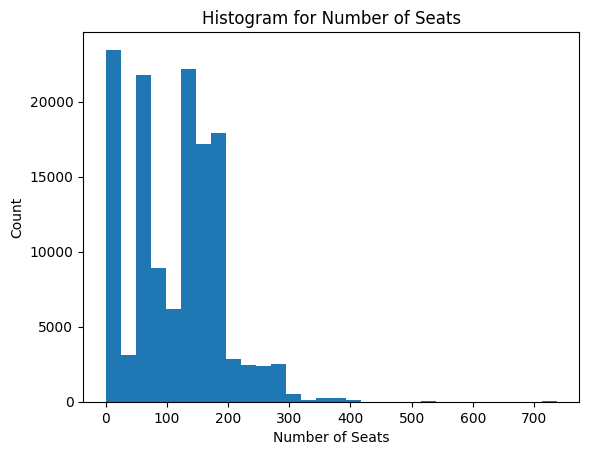

In [97]:
# Create histogram for number of seats
plt.hist(data['NUMBER_OF_SEATS'], bins=30)
plt.title('Histogram for Number of Seats')
plt.xlabel('Number of Seats')
plt.ylabel('Count')
plt.show()

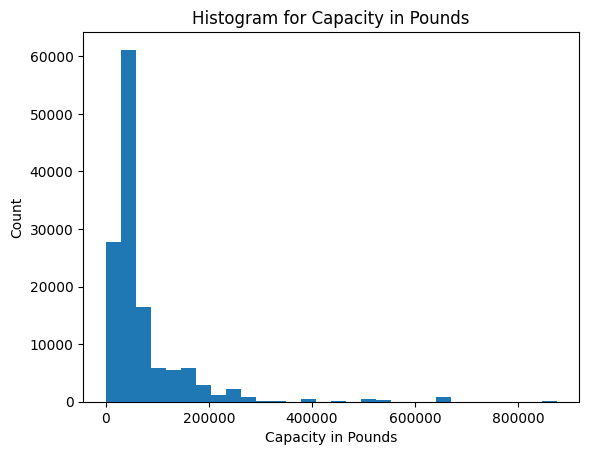

In [98]:
# Create histogram for capacity in pounds
plt.hist(data['CAPACITY_IN_POUNDS'], bins=30)
plt.title('Histogram for Capacity in Pounds')
plt.xlabel('Capacity in Pounds')
plt.ylabel('Count')
plt.show()

In [99]:
# Use Box-Cox transformation, create new columns
from scipy.stats import boxcox

# Only pass boxcox on positive values
valid_seats=data['NUMBER_OF_SEATS']>0
valid_pounds=data['CAPACITY_IN_POUNDS']>0

# Apply boxcox to valid rows. Since boxcox returns two values, only take the first one
data.loc[valid_seats, "NUMBER_OF_SEATS_BOXCOX"], _ = boxcox(data.loc[valid_seats, 'NUMBER_OF_SEATS'])
data.loc[valid_pounds, 'CAPACITY_IN_POUNDS_BOXCOX'], _= boxcox(data.loc[valid_pounds, 'CAPACITY_IN_POUNDS'])

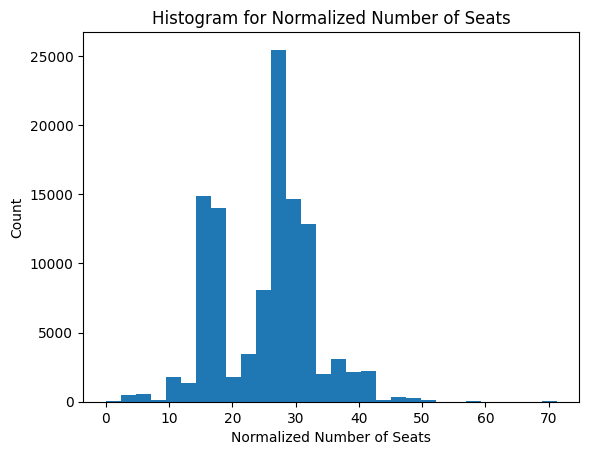

In [100]:
# Create histogram for boxcox number of seats col
plt.hist(data['NUMBER_OF_SEATS_BOXCOX'], bins=30)
plt.title('Histogram for Normalized Number of Seats')
plt.xlabel('Normalized Number of Seats')
plt.ylabel('Count')
plt.show()

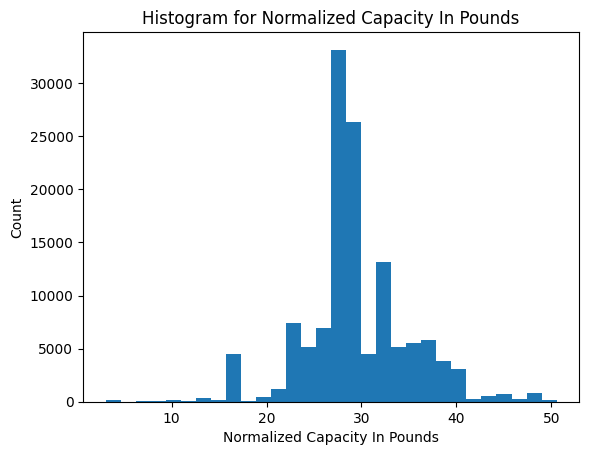

In [101]:
# Create histogram for boxcox capacity in pounds col
plt.hist(data['CAPACITY_IN_POUNDS_BOXCOX'], bins=30)
plt.title('Histogram for Normalized Capacity In Pounds')
plt.xlabel('Normalized Capacity In Pounds')
plt.ylabel('Count')
plt.show()

The histograms before normalization are skewed heavily to the right, which is not great for creating statistical models such as linear regressors. The Boxcox histograms are much more symetrical and look as if they mimic a normal distribution. This makes it much easier to perform machine learning tasks on our data.

## Task 5

Create new column size, which attaches a qualitative label to the quantitative number of seats column.

In [105]:
# Find quantile values for number of seats data
q1=data['NUMBER_OF_SEATS'].quantile(0.25)
q2=data['NUMBER_OF_SEATS'].quantile(0.5)
q3=data['NUMBER_OF_SEATS'].quantile(0.75)

# Create a function to assign values for this column
def size_col(seats):
    if seats<q1:
        return "SMALL"
    elif seats<q2:
        return 'MEDIUM'
    elif seats<q3:
        return "LARGE"
    else:
        return 'XLARGE'
    
# Apply this function to add the column SIZE
data['SIZE']=data['NUMBER_OF_SEATS'].apply(size_col)

Create plots for proportions of aircrafts operating vs not for each size group

In [107]:
# Find proportions using data.groupby. Placing normalize=True in the value_counts statement allows us to get proportions rather than counts
operating_proportions=data.groupby('SIZE')['OPERATING_STATUS'].value_counts(normalize=True)
operating_proportions

SIZE    OPERATING_STATUS
LARGE   Y                   0.962423
        N                   0.037577
MEDIUM  Y                   0.936989
        N                   0.063011
SMALL   Y                   0.959893
        N                   0.040107
XLARGE  Y                   0.973358
        N                   0.026642
Name: proportion, dtype: float64

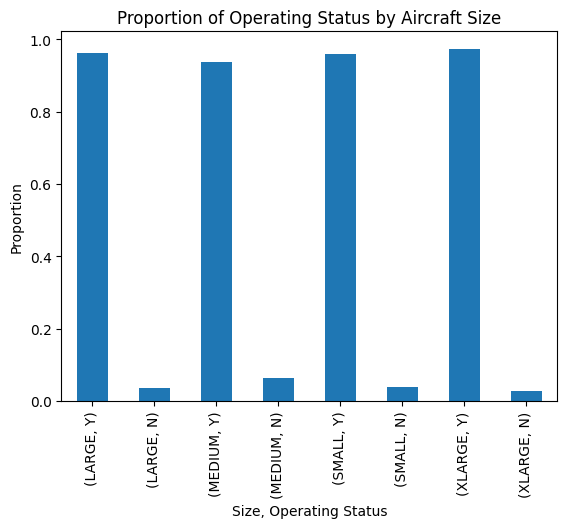

In [108]:
# Create proportion plot of operating status
operating_proportions.plot(kind='bar', stacked=True)
plt.title('Proportion of Operating Status by Aircraft Size')
plt.xlabel('Size, Operating Status')
plt.ylabel('Proportion')
plt.show()

Create plots for proportions of aircraft status groups for each size group

In [110]:
# Find proportions using data.groupby. Placing normalize=True in the value_counts statement allows us to get proportions rather than counts
status_proportions=data.groupby('SIZE')['AIRCRAFT_STATUS'].value_counts(normalize=True)
status_proportions

SIZE    AIRCRAFT_STATUS
LARGE   O                  0.642146
        B                  0.246293
        A                  0.111562
MEDIUM  B                  0.536721
        O                  0.405737
        A                  0.057543
SMALL   O                  0.720795
        B                  0.242823
        A                  0.036382
XLARGE  O                  0.695000
        B                  0.235389
        A                  0.069611
Name: proportion, dtype: float64

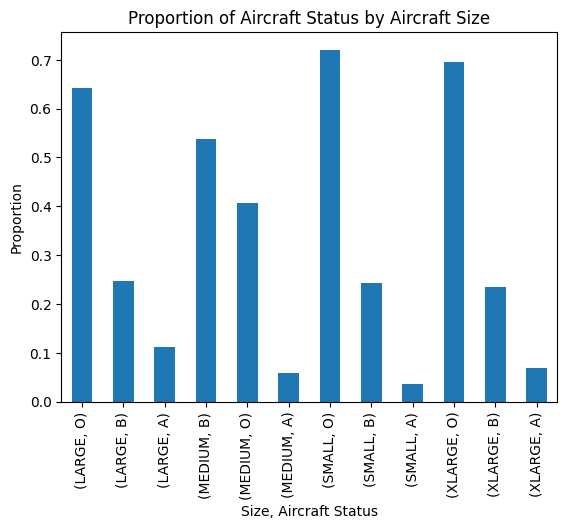

In [111]:
# Create proportion plot of aircraft status
status_proportions.plot(kind='bar', stacked=True)
plt.title('Proportion of Aircraft Status by Aircraft Size')
plt.xlabel('Size, Aircraft Status')
plt.ylabel('Proportion')
plt.show()

From the above plots, we see that aircraft size does not affect operating status. All sizes have an operating status of yes between 93-97% of the time, with XLARGE having the highest number of yes's and medium having the lowest number of yes's. We do see some differences in the aircraft status column, as the small aircrafts are more likely to be listed as owned. We see that medium and large aircrafts are more likely to be listed as A or B, which means they are on a lease. However, extra large aircrafts are almost as likely as small aircrafts to be owned. 